In [1]:
from torchvision import datasets, transforms

In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F

import numpy as np

In [3]:
def sample_gumbel(n,k):
    unif = torch.distributions.Uniform(0,1).sample((n,k))
    g = -torch.log(-torch.log(unif))
    return g

In [4]:
def sample_gumbel_softmax(pi, n, temperature):
    k = len(pi)
    g = sample_gumbel(n, k)
    h = (g + torch.log(pi))/temperature
    h_max = h.max(dim=1, keepdim=True)[0]
    h = h - h_max
    cache = torch.exp(h)
#     print(pi, torch.log(pi), intmdt)
    y = cache / cache.sum(dim=-1, keepdim=True)
    return y

In [5]:

import matplotlib.pyplot as plt

## Probability Distribution

(0.0, 1.0)

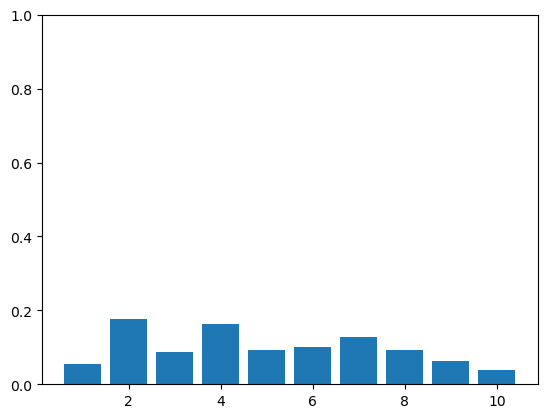

In [6]:
k = 10
pi = torch.randint(high=100, size=(k,), dtype=torch.float)
pi = pi/pi.sum()
plt.bar(np.arange(k)+1, pi.numpy())
plt.ylim(0,1)

### Gumbel Softmax

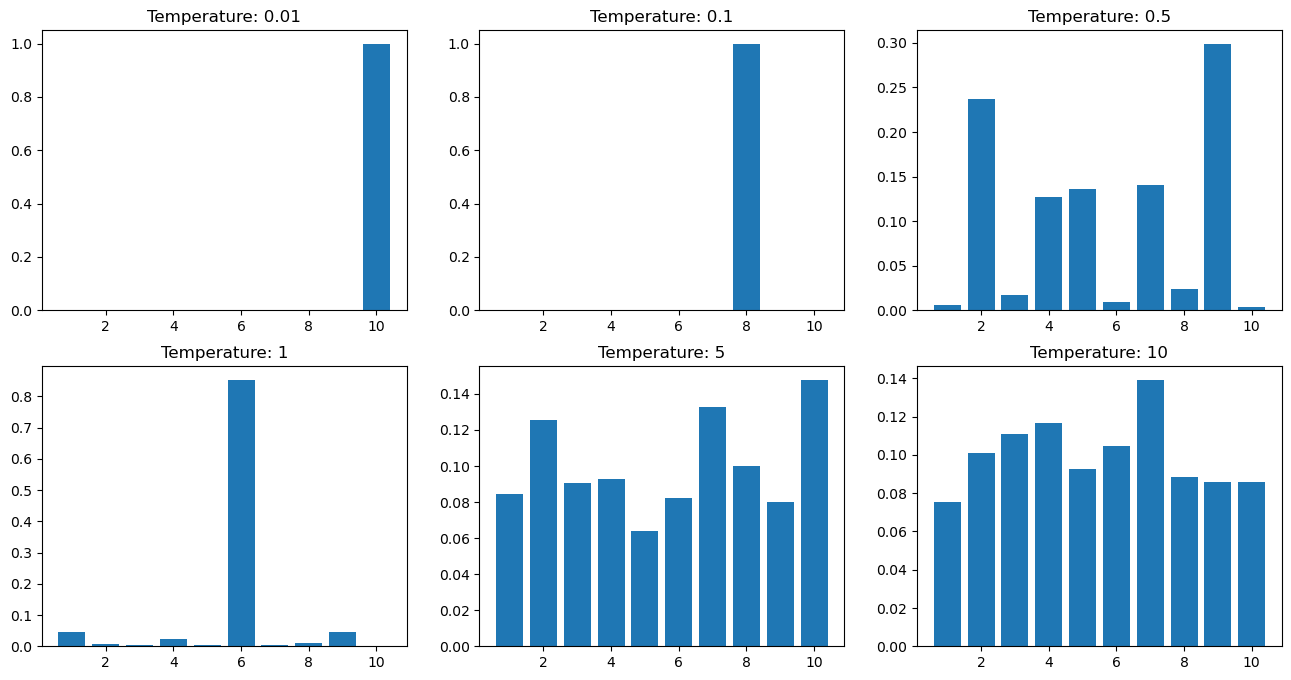

In [7]:
n = 1
tau_vals = [0.01, 0.1, 0.5, 1, 5, 10]
plt.figure(figsize=(16,8))
for i in range(1, 7):
    plt.subplot(230+i)
    z = sample_gumbel_softmax(pi=pi, n=n, temperature=tau_vals[i-1])
    plt.bar(np.arange(k)+1, z.flatten().numpy())
    plt.title('Temperature: {}'.format(tau_vals[i-1]))
# plt.ylim(0,1)